In [77]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [78]:
class Product:
    PB1 = "PICNIC_BASKET1"
    PB2 = "PICNIC_BASKET2"
    JAMS = "JAMS"
    CROISSANTS = "CROISSANTS"
    DJEMBES = "DJEMBES"
    SYNTHETIC = "SYNTHETIC"
    SPREAD = "SPREAD"

In [79]:
start_day = 2

prices = pd.concat([pd.read_csv(f'round5/prices_round_5_day_{i}.csv', sep=';') for i in range(2, 5)], ignore_index=True)
trades = pd.concat([pd.read_csv(f'round5/trades_round_5_day_{i}.csv', sep=';') for i in range(2, 5)], ignore_index=True)
observations = []
for day in range(2, 5):
    odf = pd.read_csv(f'round5/observations_round_5_day_{day}.csv')
    odf['day'] = day
    observations.append(odf)
observations = pd.concat(observations, ignore_index=True)

prices['time'] = prices['timestamp'] + (prices['day'] - start_day) * 1_000_000

In [80]:
prices['swmid'] = (prices['bid_price_1'] * prices['ask_volume_1'] + prices['ask_price_1'] * prices['bid_volume_1']) / (prices['ask_volume_1'] + prices['bid_volume_1'])

In [81]:
croissants = prices[prices["product"] == Product.CROISSANTS].reset_index(drop=True).copy()
jams = prices[prices["product"] == Product.JAMS].reset_index(drop=True).copy()
djembes = prices[prices["product"] == Product.DJEMBES].reset_index(drop=True).copy()
pb1 = prices[prices["product"] == Product.PB1].reset_index(drop=True).copy()
pb2 = prices[prices["product"] == Product.PB2].reset_index(drop=True).copy()

In [82]:
[croissants, jams, djembes, pb1, pb2] = [df.drop(columns=['product']) for df in [croissants, jams, djembes, pb1, pb2]]

In [83]:
time_cols = ['timestamp', 'day', 'time']

croissants = croissants.rename(columns={col: col + '_' + Product.CROISSANTS for col in croissants.columns if col not in time_cols})
jams = jams.rename(columns={col: col + '_' + Product.JAMS for col in jams.columns if col not in time_cols})
djembes = djembes.rename(columns={col: col + '_' + Product.DJEMBES for col in djembes.columns if col not in time_cols})
pb1 = pb1.rename(columns={col: col + '_' + Product.PB1 for col in pb1.columns if col not in time_cols})
pb2 = pb2.rename(columns={col: col + '_' + Product.PB2 for col in pb2.columns if col not in time_cols})

`PICNIC_BASKET1` contains three products: 

1. Six (6) `CROISSANTS`
2. Three (3) `JAMS`
3. One (1) `DJEMBE`

`PICNIC_BASKET2` contains just two products: 

1. Four (4) `CROISSANTS`
2. Two (2) `JAMS`

Aside from the Picnic Baskets, you can now also trade the three products individually on the island exchange. 

Position limits for the newly introduced products:

- `CROISSANT`: 250
- `JAM`: 350
- `DJEMBE`: 60
- `PICNIC_BASKET1`: 60
- `PICNIC_BASKET2`: 100

In [84]:
# join croissants, james, djembes, basket1, basket2 on timestamp

mk = croissants.merge(jams, on=time_cols)
mk = mk.merge(djembes, on=time_cols)
mk = mk.merge(pb1, on=time_cols)
mk = mk.merge(pb2, on=time_cols)

In [85]:
pb2

,day,timestamp,bid_price_1_PICNIC_BASKET2,bid_volume_1_PICNIC_BASKET2,bid_price_2_PICNIC_BASKET2,bid_volume_2_PICNIC_BASKET2,bid_price_3_PICNIC_BASKET2,bid_volume_3_PICNIC_BASKET2,ask_price_1_PICNIC_BASKET2,ask_volume_1_PICNIC_BASKET2,ask_price_2_PICNIC_BASKET2,ask_volume_2_PICNIC_BASKET2,ask_price_3_PICNIC_BASKET2,ask_volume_3_PICNIC_BASKET2,mid_price_PICNIC_BASKET2,profit_and_loss_PICNIC_BASKET2,time,swmid_PICNIC_BASKET2
0,2,0,30094.0,11.0,30093.0,27.0,NaN,NaN,30099.0,1.0,30100.0,37.0,NaN,NaN,30096.5,0.0,0,30098.583333
1,2,100,30096.0,3.0,30093.0,39.0,NaN,NaN,30099.0,19.0,30100.0,20.0,NaN,NaN,30097.5,0.0,100,30096.409091
2,2,200,30092.0,15.0,30091.0,20.0,NaN,NaN,30097.0,2.0,30098.0,33.0,NaN,NaN,30094.5,0.0,200,30096.411765
3,2,300,30093.0,1.0,30092.0,33.0,NaN,NaN,30098.0,1.0,30099.0,33.0,NaN,NaN,30095.5,0.0,300,30095.500000
4,2,400,30096.0,46.0,NaN,NaN,NaN,NaN,30103.0,46.0,NaN,NaN,NaN,NaN,30099.5,0.0,400,30099.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4,999500,30382.0,1.0,30381.0,41.0,NaN,NaN,30387.0,15.0,30388.0,27.0,NaN,NaN,30384.5,0.0,2999500,30382.312500
29996,4,999600,30383.0,2.0,30382.0,34.0,NaN,NaN,30388.0,2.0,30389.0,34.0,NaN,NaN,30385.5,0.0,2999600,30385.500000
29997,4,999700,30382.0,35.0,NaN,NaN,NaN,NaN,30388.0,16.0,30389.0,19.0,NaN,NaN,30385.0,0.0,2999700,30386.117647
29998,4,999800,30382.0,22.0,30381.0,28.0,NaN,NaN,30388.0,50.0,NaN,NaN,NaN,NaN,30385.0,0.0,2999800,30383.833333


In [86]:
synth_weights = [
    {
        Product.CROISSANTS: 6,
        Product.JAMS: 3,
        Product.DJEMBES: 1
    },
    {
        Product.CROISSANTS: 4,
        Product.JAMS: 2
    },
    {
        Product.PB2: 1,
        Product.CROISSANTS: 2,
        Product.JAMS: 1,
        Product.DJEMBES: 1
    },
    {
        Product.PB2: 3,
        Product.DJEMBES: 2
    }
]

spread_weights = [
    {
        Product.PB1: 1,
        **{p: -w for p, w in synth_weights[0].items()}
    },
    {
        Product.PB2: 1,
        **{p: -w for p, w in synth_weights[1].items()}
    },
    {
        Product.PB1: 1,
        **{p: -w for p, w in synth_weights[2].items()}
    },
    {
        Product.PB1: 2,
        **{p: -w for p, w in synth_weights[3].items()}
    },
]

# interested in third spread up there
for i in range(len(synth_weights)):
    mk[f'swmid_synth{i}'] = 0
    weights = synth_weights[i]
    for product, weight in weights.items():
        mk[f'swmid_synth{i}'] += mk[f'swmid_{product}'] * weight

for i in range(len(spread_weights)):
    mk[f'swmid_spread{i}'] = 0
    weights = spread_weights[i]
    for product, weight in weights.items():
        mk[f'swmid_spread{i}'] += mk[f'swmid_{product}'] * weight

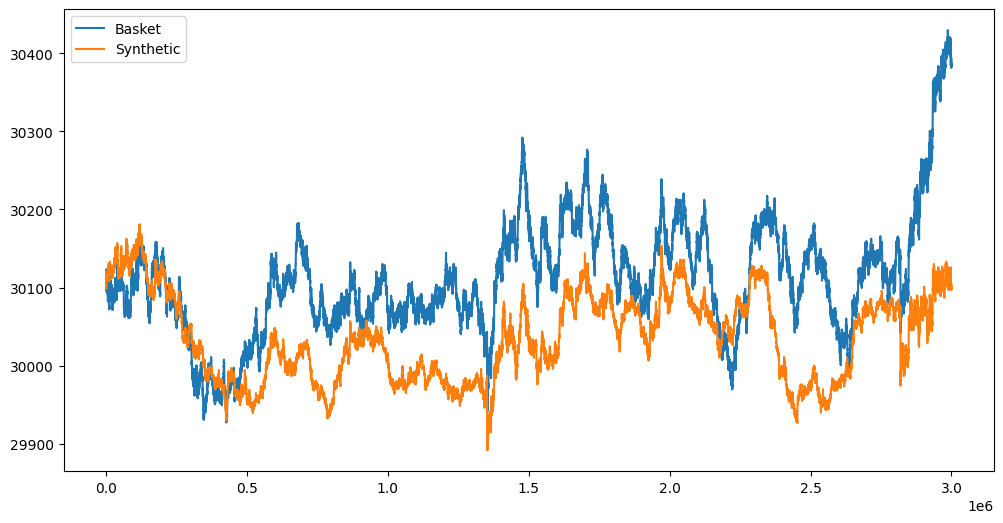

In [87]:
synth = 1
plt.figure(figsize=(12, 6))
plt.plot(mk['time'], mk[f'swmid_{Product.PB2}'], label='Basket')
plt.plot(mk['time'], mk[f'swmid_synth{synth}'], label='Synthetic')
plt.legend()
plt.show()

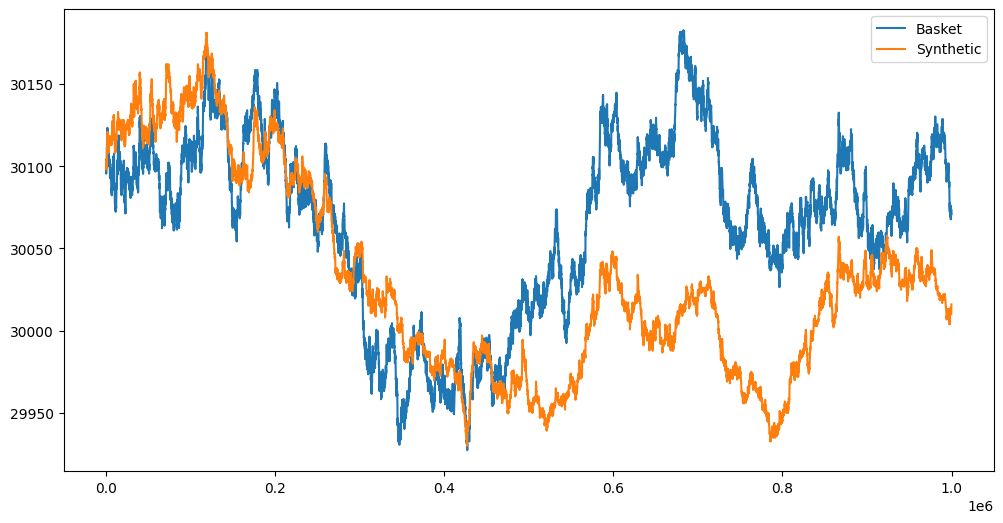

In [88]:
df = mk[mk['day'] == 2].copy()

synth = 1
prod = Product.PB2

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df[f'swmid_{prod}'], label='Basket')
plt.plot(df['time'], df[f'swmid_synth{synth}'], label='Synthetic')
plt.legend()
plt.show()

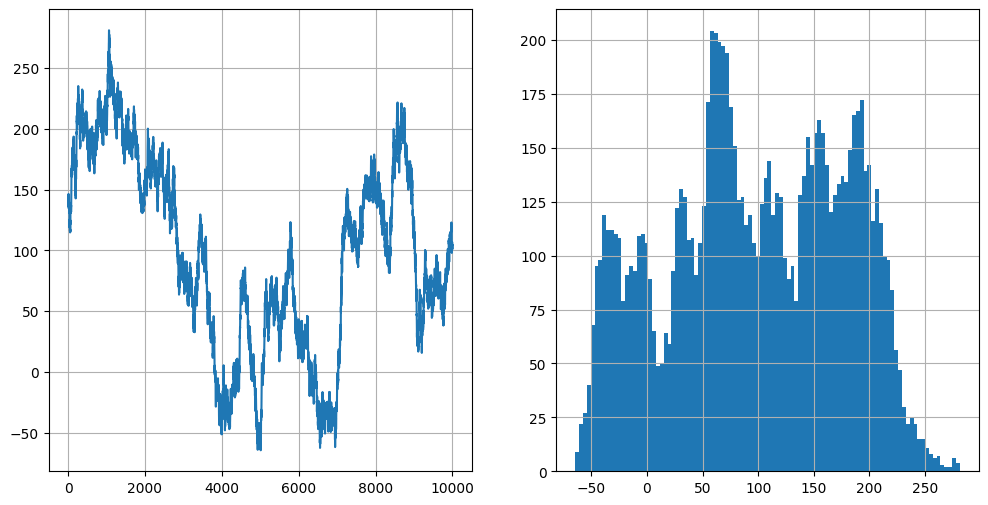

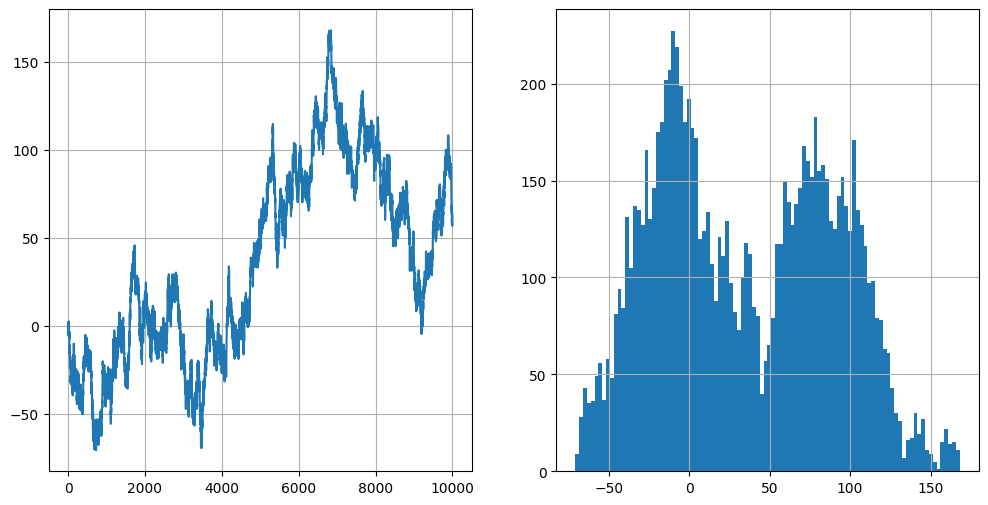

In [93]:
synth = 0
prod = Product.PB1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df[f'swmid_spread{synth}'].plot()
plt.grid()
plt.subplot(1, 2, 2)
df[f'swmid_spread{synth}'].hist(bins=100)
plt.show()

synth = 1
prod = Product.PB2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df[f'swmid_spread{synth}'].plot()
plt.grid()
plt.subplot(1, 2, 2)
df[f'swmid_spread{synth}'].hist(bins=100)
plt.show()

<Axes: >

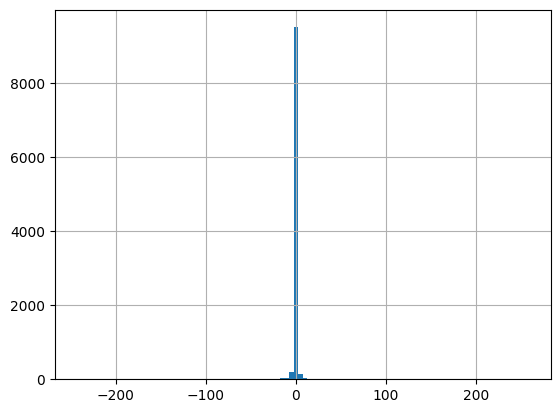

In [102]:
df['swmid_spread1'].pct_change(20).hist(bins=100)
df['swmid_synth1'].pct_change(20).hist(bins=100)

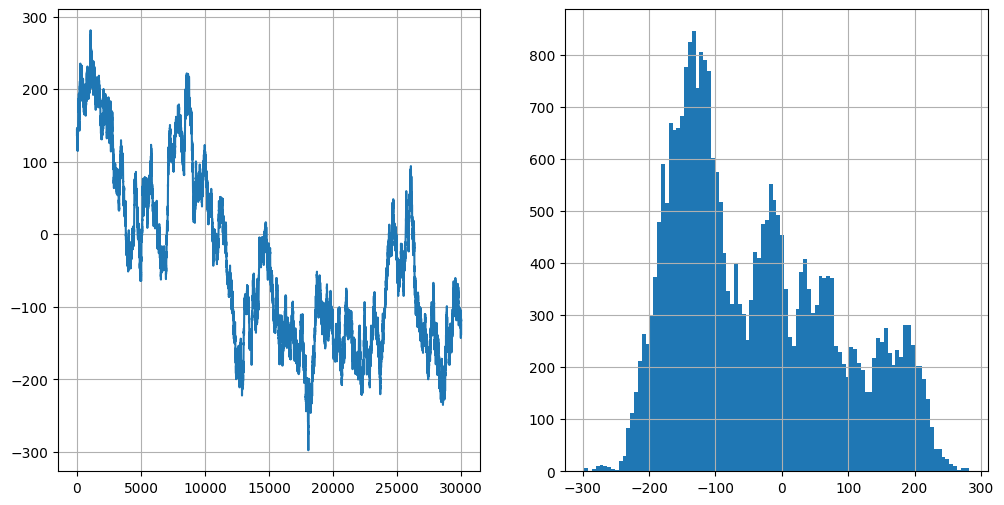

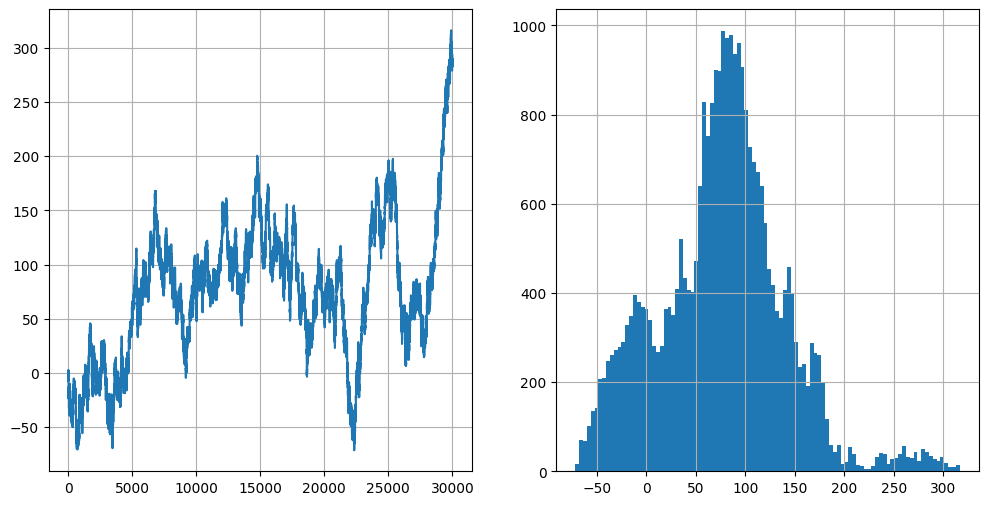

In [91]:
synth = 0
prod = Product.PB1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
(mk[f'swmid_{prod}'] - mk[f'swmid_synth{synth}']).plot()
plt.grid()
plt.subplot(1, 2, 2)
(mk[f'swmid_{prod}'] - mk[f'swmid_synth{synth}']).hist(bins=100)
plt.show()

synth = 1
prod = Product.PB2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
(mk[f'swmid_{prod}'] - mk[f'swmid_synth{synth}']).plot()
plt.grid()
plt.subplot(1, 2, 2)
(mk[f'swmid_{prod}'] - mk[f'swmid_synth{synth}']).hist(bins=100)
plt.show()

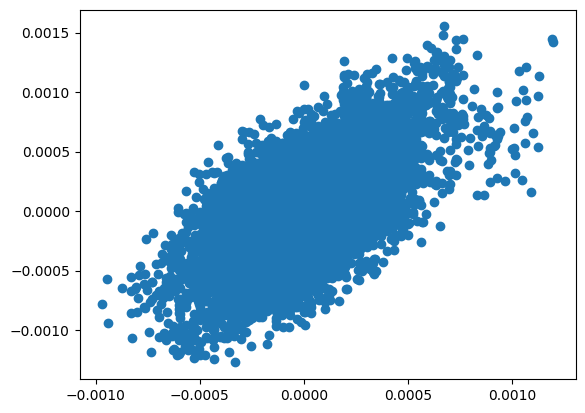

In [47]:
'''
it's not spreads that we trade, maybe return in synthetic predicts returns on component

if it's not pct_change thenn it might simply be raw price? how do we plot the price without multicollinearity?
maybe we can do diff instead?
'''

df = mk[mk['day'] == 2].copy()

synth = 1
prod = Product.PB2

period = 20
shift = 1

x = df[f'swmid_synth{synth}'].pct_change(period).shift(1)
y = df['swmid_' + prod].pct_change(period)

# x = df[f'swmid_synth{synth}'].diff(period).shift(shift)
# y = df['swmid_' + prod].diff(period)

# # Remove outliers for both x and y that are more than 3 standard deviations away
# x_mean, x_std = x.mean(), x.std()
# y_mean, y_std = y.mean(), y.std()

# std_filter = 10

# x_filtered = x[(x > x_mean - std_filter * x_std) & (x < x_mean + std_filter * x_std)]
# y_filtered = y[(y > y_mean - std_filter * y_std) & (y < y_mean + std_filter * y_std)]

# # Align x and y to ensure they have the same indices after filtering
# common_indices = x_filtered.index.intersection(y_filtered.index)
# x = x_filtered.loc[common_indices]
# y = y_filtered.loc[common_indices]

plt.scatter(x, y)
plt.show()

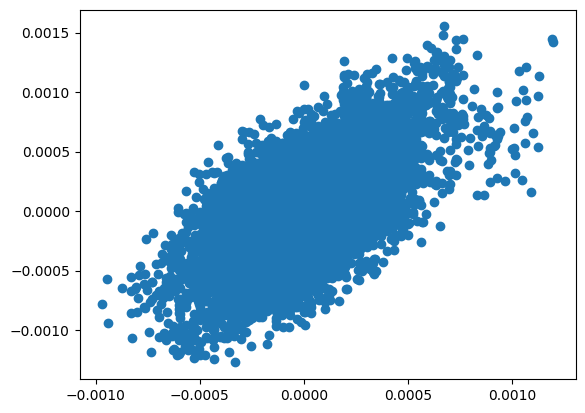

In [48]:
'''
it's not spreads that we trade, maybe return in synthetic predicts returns on component

if it's not pct_change thenn it might simply be raw price? how do we plot the price without multicollinearity?
maybe we can do diff instead?
'''

df = mk[mk['day'] == 2].copy()

synth = 1
prod = Product.PB2

period = 20
shift = 1

x = df[f'swmid_synth{synth}'].pct_change(period).shift(1)
y = df['swmid_' + prod].pct_change(period)

# x = df[f'swmid_synth{synth}'].diff(period).shift(shift)
# y = df['swmid_' + prod].diff(period)

# # Remove outliers for both x and y that are more than 3 standard deviations away
# x_mean, x_std = x.mean(), x.std()
# y_mean, y_std = y.mean(), y.std()

# std_filter = 10

# x_filtered = x[(x > x_mean - std_filter * x_std) & (x < x_mean + std_filter * x_std)]
# y_filtered = y[(y > y_mean - std_filter * y_std) & (y < y_mean + std_filter * y_std)]

# # Align x and y to ensure they have the same indices after filtering
# common_indices = x_filtered.index.intersection(y_filtered.index)
# x = x_filtered.loc[common_indices]
# y = y_filtered.loc[common_indices]

plt.scatter(x, y)
plt.show()

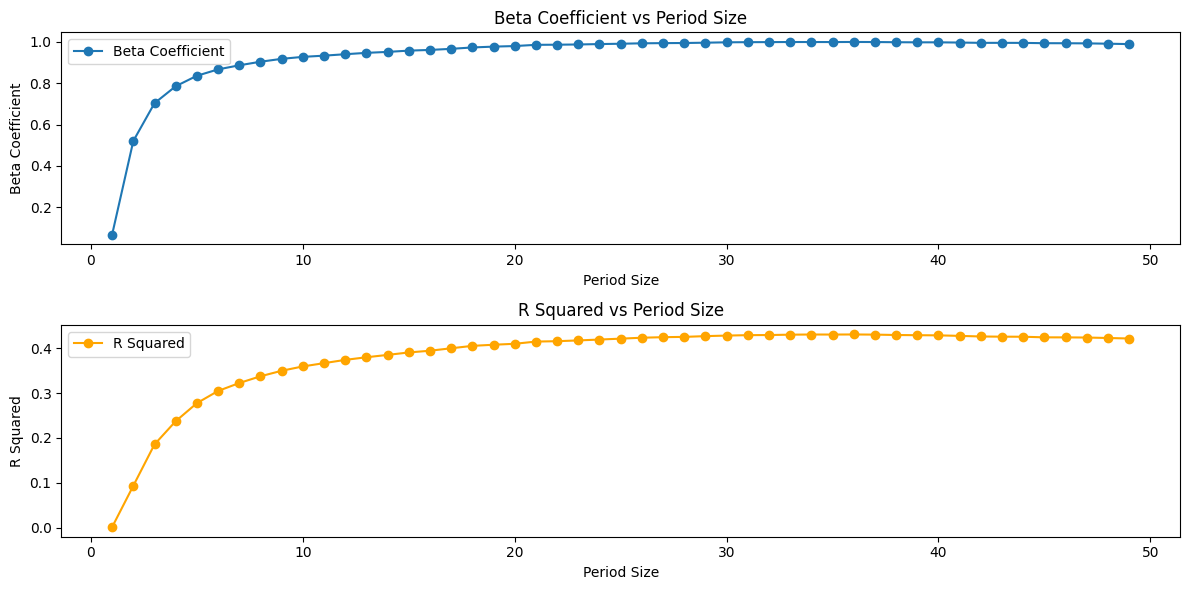

In [49]:
df = mk[mk['day'] == 2].copy()

from sklearn.linear_model import LinearRegression

synth = 1
prod = Product.PB2

periods = range(1, 50)

betas = []
r_squared = []

for period in periods:
    x = df[f'swmid_synth{synth}'].pct_change(period).shift(1).dropna()
    y = df['swmid_' + prod].pct_change(period).dropna()

    idx = x.index.intersection(y.index)

    X = x.loc[idx].values.reshape((-1, 1))
    y = y.loc[idx].values

    model = LinearRegression()
    model.fit(X, y)

    betas.append(model.coef_[0])
    r_squared.append(model.score(X, y))

# Plot beta coefficients and R-squared values
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(periods, betas, label='Beta Coefficient', marker='o')
plt.title('Beta Coefficient vs Period Size')
plt.xlabel('Period Size')
plt.ylabel('Beta Coefficient')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(periods, r_squared, label='R Squared', marker='o', color='orange')
plt.title('R Squared vs Period Size')
plt.xlabel('Period Size')
plt.ylabel('R Squared')
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
x = df[f'swmid_synth{synth}'].pct_change(20).shift(1).dropna()
y = df['swmid_' + prod].pct_change(20).dropna()

idx = x.index.intersection(y.index)

X = x.loc[idx].values.reshape((-1, 1))
y = y.loc[idx].values

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
model.coef_

array([0.97967075])

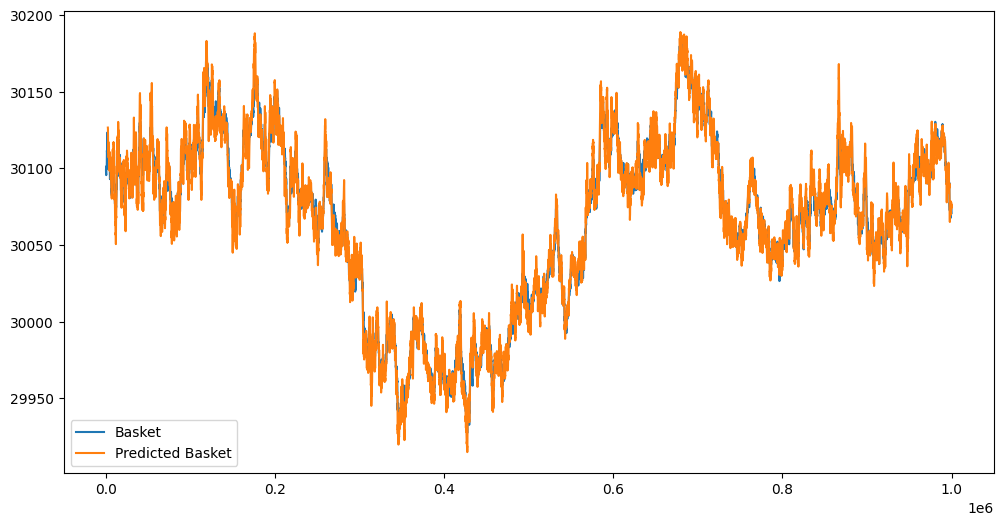

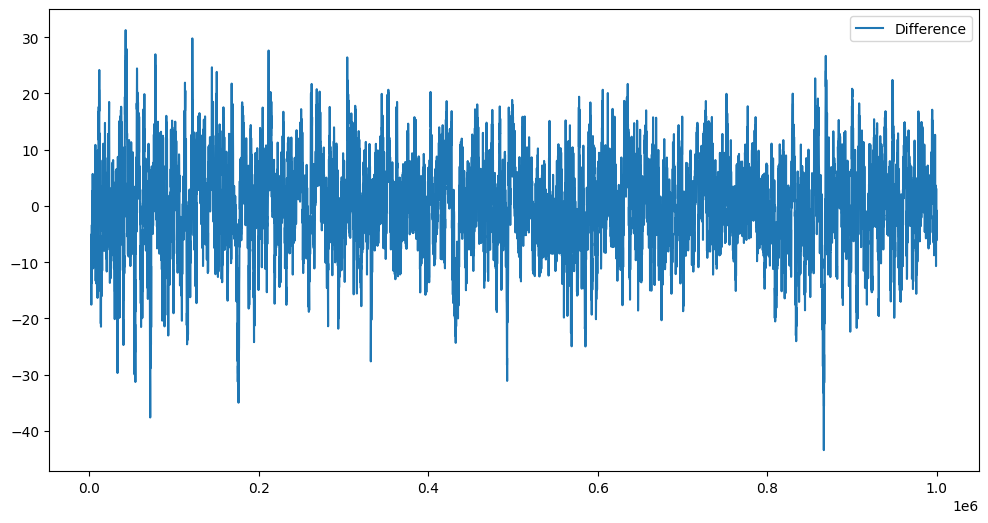

In [ ]:
beta = 0.97967075
basket_pct = df['swmid_synth1'].pct_change(20).shift(1) * beta
basket_predt1 = df['swmid_' + Product.PB2] * (1 + basket_pct)
plt.figure(figsize=(12, 6))
# plt.plot(df['time'], df['swmid_' + Product.PB2], label='Basket')
plt.plot(df['time'], basket_predt1.shift(1), label='Predicted Basket')
plt.plot(df['time'], basket_predt1.shift(1), label='Predicted Basket')
plt.legend()
plt.show()

diff = df['swmid_' + Product.PB2] - basket_predt1.shift(1)
plt.figure(figsize=(12, 6))
plt.plot(df['time'], diff, label='Difference')
plt.legend()
plt.show()

In [ ]:
betas[1 + 20]

'''
equation:

basket2 fractional change at t+1 = synth fractional change at t * 0.97967075

'''

np.float64(0.9861970898099717)

In [132]:
y

1      -7.223737e-05
2       8.884106e-08
3      -3.029480e-05
4       1.329102e-04
5       5.814050e-05
            ...     
9995   -2.602821e-05
9996   -5.160367e-05
9997   -5.550140e-06
9998    9.773646e-05
9999    3.760675e-06
Name: swmid_PICNIC_BASKET2, Length: 9999, dtype: float64

In [ ]:
df = mk[mk['day'] == -1]

In [ ]:
q = (mk['day'] == -1)
synth = 2

mk[f'synth{synth}_sma'] = mk[f'swmid_synth{synth}'].rolling(window=60).mean()
mk[f'synth{synth}_std'] = mk[f'swmid_synth{synth}'].rolling(window=50).std()
mk[f'synth{synth}_zscore'] = (mk[f'swmid_synth{synth}'] - mk[f'synth{synth}_sma']) / mk[f'synth{synth}_std']

fig = go.Figure()

fig.add_trace(go.Scatter(x=mk.loc[q, 'timestamp'], y=mk.loc[q, f'swmid_synth{synth}'], mode='lines', name=f'SWMid Synth{synth}'))
# fig.add_trace(go.Scatter(x=mk.loc[q, 'timestamp'], y=mk.loc[q, f'synth{synth}_sma'], mode='lines', name=f'Synth{synth} SMA'))
# fig.add_trace(go.Scatter(x=mk.loc[q, 'timestamp'], y=mk.loc[q, f'synth{synth}_zscore'], mode='lines', name=f'Synth{synth} Z-Score', yaxis='y2'))

# fig.update_layout(yaxis2=dict(title='Z Score', overlaying='y', side='right'))
# fig.update_layout(title=f'Synth{synth} Z-Score', xaxis_title='Timestamp', yaxis_title='Z-Score')
fig.show()

In [116]:
mk['swmid_synth0'].pct_change()

0              NaN
1        -0.401754
2         0.315008
3        -0.844639
4       -22.000000
           ...    
29995     0.012438
29996     0.008193
29997    -0.044025
29998     0.090620
29999     0.004756
Name: swmid_synth0, Length: 30000, dtype: float64

In [127]:
q = mk['day'] == 1

fig = go.Figure()
fig.add_trace(go.Scatter(x=mk[q]['timestamp'], y=mk[q]['swmid_synth0'].pct_change(), mode='lines', name='SWMid Synth0'))
fig.update_layout(title='SWMid Synth0 vs Timestamp', xaxis_title='Timestamp', yaxis_title='SWMid Synth0')
fig.show()

In [129]:
mk['swmid_synthbask'] = 6 * mk['swmid_CROISSANTS'] + 3 * mk['swmid_JAMS'] + 1 * mk['swmid_DJEMBES'] + 1

In [ ]:
# plot of swmid_synthbask
fig = go.Figure()
fig.add_trace(go.Scatter(x=mk[q]['timestamp'], y=mk[q]['swmid_synthbask'], mode='lines', name='SWMid SynthBask'))
fig.add_trace(go.Scatter(x=mk[q]['timestamp'], y=mk[q]['swmid_PICNIC_BASKET1'], mode='lines', name='Basket1'))
fig.add_trace(go.Scatter(x=mk[q]['timestamp'], y=[mk[q]['swmid_synthbask'].mean()] * len(mk[q]['timestamp']), mode='lines', name='Mean'))
fig.update_layout(title='SWMid SynthBask vs Timestamp', xaxis_title='Timestamp', yaxis_title='SWMid SynthBask')
fig.show()

In [138]:
# plot pct change of synthbasket change against basket1 change
fig = go.Figure()
fig.add_trace(go.Scatter(x=mk[q]['swmid_synthbask'].pct_change(), y=mk[q]['swmid_PICNIC_BASKET1'].pct_change().shift(30), mode='markers', name='SWMid SynthBask vs Basket1'))
fig.update_layout(title='SWMid SynthBask vs Basket1', xaxis_title='SWMid SynthBask', yaxis_title='Basket1')
fig.show()

ValueError: supplied range of [-inf, inf] is not finite

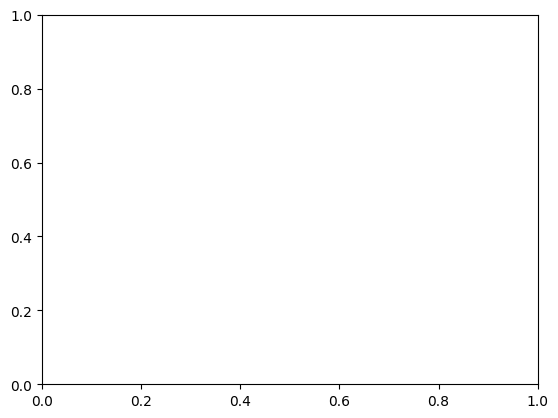

In [ ]:
mk[q]['swmid_synth0'].pct_change()

In [97]:
mk.groupby('day')['swmid_synth1'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
-1,10000.0,58.090589,51.870394,-102.119048,39.654814,66.000000,93.547980,149.593496
0,10000.0,-3.858777,55.128494,-122.736842,-43.843318,-12.569952,34.421825,134.450292
1,10000.0,36.469181,55.148739,-105.892208,-9.250658,43.500000,73.500000,148.642281


In [98]:
mk.groupby('day')['swmid_synth2'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
-1,10000.0,11.963393,65.660621,-146.694838,-39.860788,8.126541,64.468781,168.944444
0,10000.0,47.781266,63.231961,-96.094686,4.384151,54.859748,92.462005,208.071429
1,10000.0,-4.112082,98.243357,-196.706897,-88.781515,-19.954685,89.563709,199.308610


In [99]:
mk.groupby('day')['swmid_synth0'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
-1,10000.0,70.053983,78.667021,-175.564951,19.450462,80.236501,120.500000,250.277618
0,10000.0,43.922489,82.788898,-130.704588,-10.010850,44.000000,110.404215,222.000000
1,10000.0,32.357099,89.161706,-197.155172,-19.490476,23.159344,102.056772,230.111570


In [100]:
mk.groupby('day')['swmid_synth3'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
-1,10000.0,-34.163803,146.841805,-362.000000,-153.854933,-28.114379,86.966169,321.388889
0,10000.0,99.421310,139.280776,-300.000000,-12.131410,133.083882,202.862575,414.666667
1,10000.0,-44.693345,226.130655,-535.406593,-241.000000,-79.238662,132.779388,402.397129


In [183]:
mk['spread1_zscore'].describe()

count    9701.000000
mean        0.252552
std         3.484058
min       -10.157279
25%        -2.210694
50%         0.050785
75%         2.689442
max        17.789029
Name: spread1_zscore, dtype: float64

day0 spread1 zscore summary
count    9701.000000
mean        0.322448
std         3.353061
min        -9.998620
25%        -2.123352
50%         0.228565
75%         2.708731
max        11.672497
Name: spread1_zscore, dtype: float64

day1
day0 spread1 zscore summary
count    9701.000000
mean        0.322448
std         3.353061
min        -9.998620
25%        -2.123352
50%         0.228565
75%         2.708731
max        11.672497
Name: spread1_zscore, dtype: float64

day1



In [ ]:
spread = mk[['timestamp', 'swmid_spread1']].copy()
spread.rename(columns={'swmid_spread1': 'swmid'}, inplace=True)
spread['spread'] = spread['swmid'].copy()

spread2 = mk[['timestamp', 'swmid_spread2']].copy()
spread2.rename(columns={'swmid_spread2': 'swmid'}, inplace=True)
spread2['spread'] = spread2['swmid'].copy()

In [152]:
from tqdm import tqdm

def cross_spread(cash, quantity):
    return cash - abs(quantity) * 10

def backtest(spread, thresh, target_position, std_window, sma_window, verbose=False):
    cash = 0
    position = 0
    pnl_hist = []
    position_hist = []
    cash_hist = []
    spread[f'std{std_window}'] = spread['spread'].rolling(window=std_window).std()
    spread[f'sma{sma_window}'] = spread['spread'].rolling(window=sma_window).mean()
    z_score = (spread['spread'].to_numpy() - spread[f'sma{sma_window}']) / spread[f'std{std_window}'].to_numpy()
    spread['spread_z'] = z_score
    for index, row in spread.iterrows():
        if index == 0:
            continue
        swmid = row['swmid']
        
        if row['spread_z'] > thresh and position != -target_position:
        
            
            quantity = -target_position - position
            cash -= (-target_position - position) * swmid
            cash = cross_spread(cash, quantity)
            position = -target_position
            
            if verbose:
                print(f"SELL {quantity} AT PRICE {swmid} AT TIME {row['timestamp']}")
        
        if row['spread_z'] < -thresh and position != target_position:
            quantity = target_position - position
            cash -= (target_position - position) * swmid
            cash = cross_spread(cash, quantity)
            position = target_position
            
            if verbose:
                print(f"BUY {quantity} FOR PRICE {swmid} AT TIME {row['timestamp']}")
    
        position_hist.append(position)
        cash_hist.append(cash)
        pnl_hist.append(cash + position * swmid)
        
    if verbose:
        print(f"PNL: {pnl_hist[-1]}")
        
    return pnl_hist


In [163]:
position_opt = [60]
thresh_opt = [1,2,3,5,6,7,7.5,8,9,10,15,20,25]
std_window_opt = [10,20,25,30,35,40,50]
sma_window_opt = [10,20,25,30,35,40,50,75, 100, 125, 150, 200, 300, 500]
opt = []
for thresh in tqdm(thresh_opt): 
    for std_window in std_window_opt: 
        for sma_window in sma_window_opt:
            for position in position_opt:
                pnl = backtest(spread2, thresh, position, std_window, sma_window)
                opt.append({"thresh": thresh, "position": position, "std_window": std_window, "sma_window": sma_window, "pnl": pnl})
#                 print("="*80)
#                 print(f"Thresh: {thresh}, Position: {position}, Std Window: {std_window}, PnL: {pnl[-1]}")
#                 print("="*80)

100%|██████████| 13/13 [02:55<00:00, 13.46s/it]


In [164]:
spread['spread'].mean()

np.float64(43.922489021349016)

In [165]:
opt.sort(key=lambda x: x['pnl'][-1], reverse=True)
top_3_pnl = opt[:3]
pnl_graph = top_3_pnl[0]['pnl']

fig = go.Figure()
fig.add_trace(go.Scatter(x=spread.index, y=pnl_graph, mode='lines', name='PnL'))
fig.show()

In [167]:
top_3_pnl = opt[:3]
top_pnl_params = top_3_pnl[0]
for params in top_3_pnl:
    print(f"thresh: {params['thresh']}, std_window: {params['std_window']}, sma_window: {params['sma_window']}, pnl: {params['pnl'][-1]}")

thresh: 8, std_window: 25, sma_window: 125, pnl: 12486.761331593298
thresh: 10, std_window: 25, sma_window: 150, pnl: 11953.98168192296
thresh: 5, std_window: 20, sma_window: 35, pnl: 10530.0


spread1
thresh: 7, std_window: 35, sma_window: 125, pnl: 24212.82352941198
thresh: 7, std_window: 50, sma_window: 200, pnl: 21864.714339038765
thresh: 5, std_window: 50, sma_window: 125, pnl: 21512.814052237227

spread2
thresh: 8, std_window: 25, sma_window: 125, pnl: 12486.761331593298
thresh: 10, std_window: 25, sma_window: 150, pnl: 11953.98168192296
thresh: 5, std_window: 20, sma_window: 35, pnl: 10530.0

In [166]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=spread.index, y=pnl_graph, mode='lines', name='PnL'))
# fig.show()

for o in opt[:5]:
    # graph the pnl
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=spread.index, y=o['pnl'], mode='lines', name='PnL'))
    fig.update_layout(title=f"Thresh: {o['thresh']}, Position: {o['position']}, Std Window: {o['std_window']}, Sma Window: {o['sma_window']}, PnL: {o['pnl'][-1]}")
    fig.show()
    